In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Define the file path
file_path = r"C:\Users\muzah\OneDrive - Louisiana State University\Spring 2025\GEOL 7132\WLD_data_final.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Display available sheet names
print(xls.sheet_names)


['7132_2023_WLD']


In [7]:
# Load the sheet (modify sheet name if necessary)
df = pd.read_excel(xls, sheet_name='7132_2023_WLD')

# Display the first few rows
df.head()


,"Geotek MSCL-SWave 9.0 - 7132_2023_WLD.out created at 21:20:16 on 2023-02-13, logged on 2023-02-13.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Processing Parameters,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,CT,RCT=7.55,W=.25,NaN,NaN,NaN


In [8]:
# Skip metadata rows if needed
df_cleaned = pd.read_excel(xls, sheet_name='7132_2023_WLD', skiprows=10)

# Display cleaned data
df_cleaned.head()


,SB DEPTH,SECT NUM,SECT DEPTH,CT,Den1,FP
0,cm,NaN,cm,cm,g/cc,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,0,16.884,NaN,NaN
3,1,1.0,1,7.579,NaN,NaN
4,2,1.0,2,7.669,NaN,NaN


In [9]:
# Extract depth and porosity columns
df_porosity = df_cleaned[['SB DEPTH', 'FP']].dropna()
df_porosity.columns = ['Depth (cm)', 'Fractional Porosity']

# Convert to numeric values
df_porosity = df_porosity.apply(pd.to_numeric, errors='coerce').dropna()

# Display cleaned data
df_porosity.head()


,Depth (cm),Fractional Porosity
5,3,0.7962
6,4,0.7269
7,5,0.7058
8,6,0.7146
9,7,0.7557


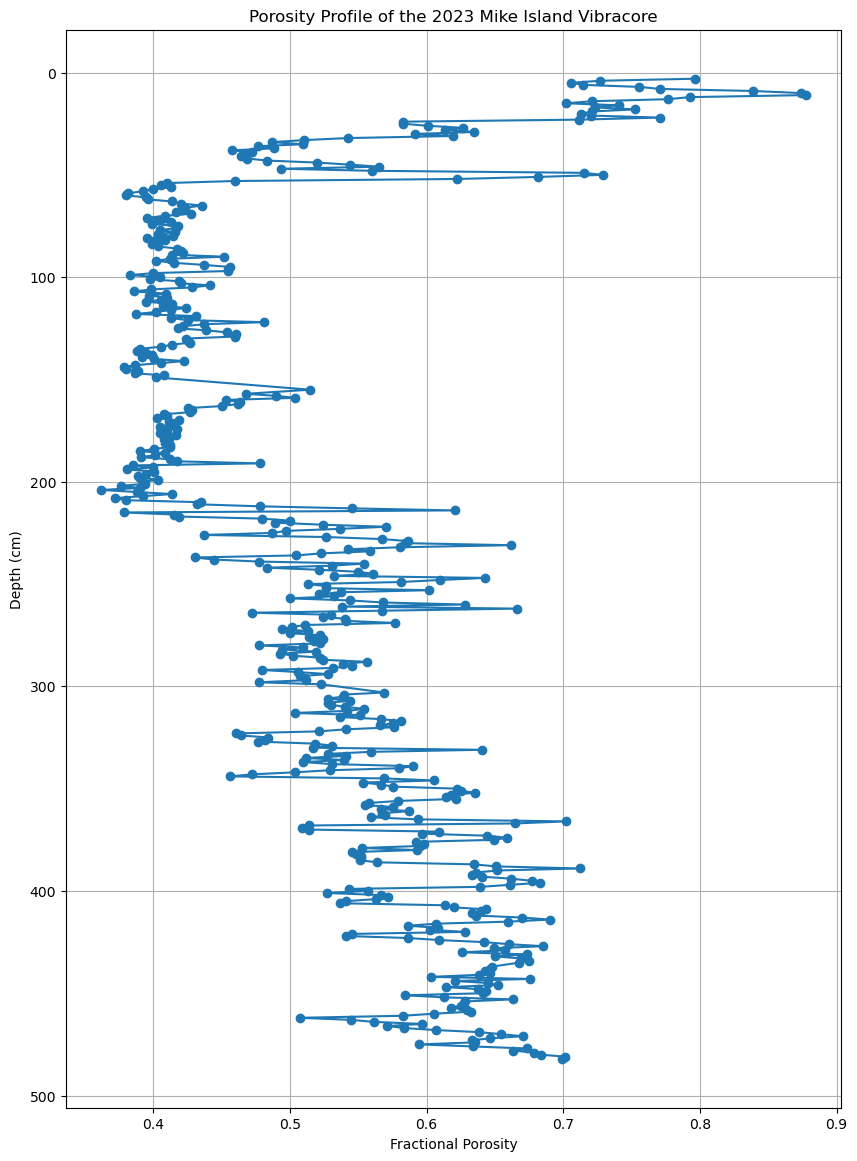

In [16]:
# Plot Porosity vs. Depth
plt.figure(figsize=(10, 14))
plt.plot(df_porosity['Fractional Porosity'], df_porosity['Depth (cm)'], marker='o', linestyle='-')
plt.xlabel('Fractional Porosity')
plt.ylabel('Depth (cm)')
plt.title('Porosity Profile of the 2023 Mike Island Vibracore')
plt.gca().invert_yaxis()  # Depth increases downward
plt.grid()
plt.show()


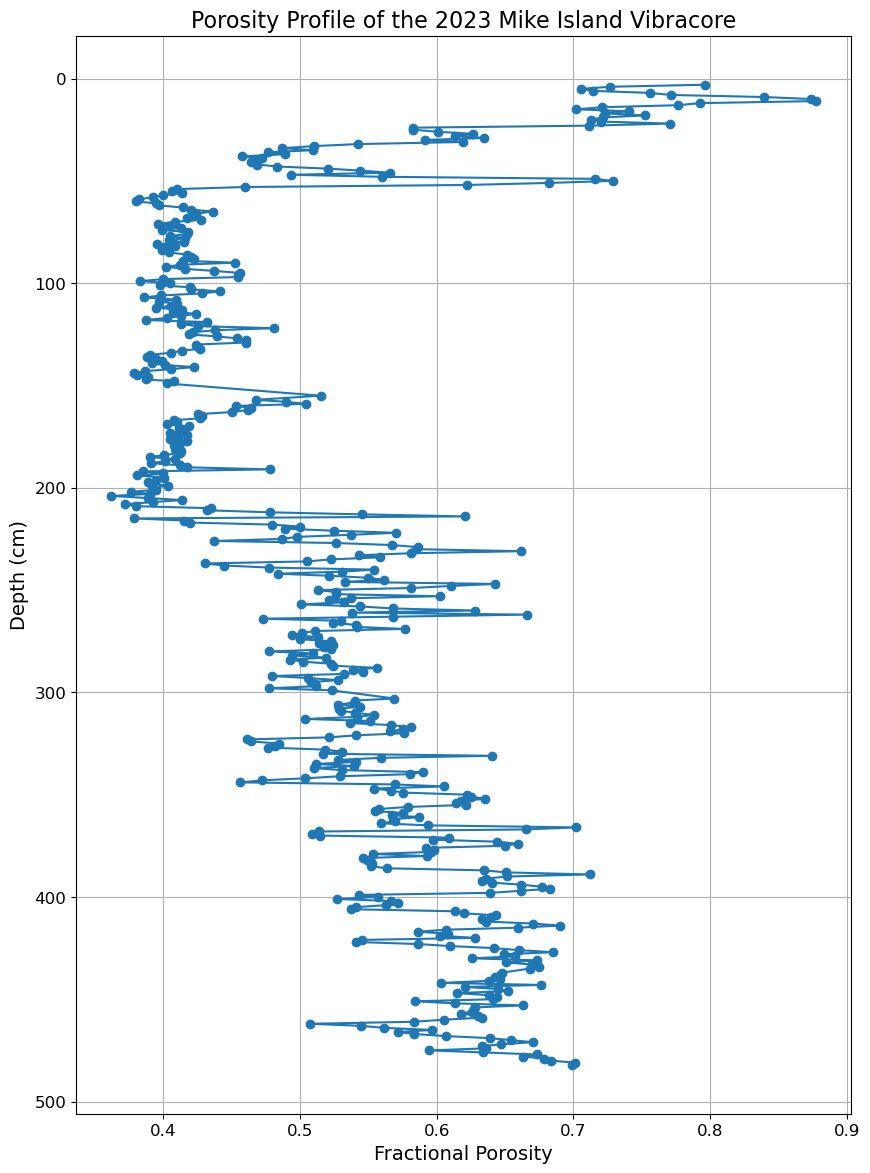

In [22]:
# Plot Porosity vs. Depth with larger figure size
plt.figure(figsize=(10, 14))  # Adjusted figure size
plt.plot(df_porosity['Fractional Porosity'], df_porosity['Depth (cm)'], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Fractional Porosity', fontsize=14)
plt.ylabel('Depth (cm)', fontsize=14)
plt.title('Porosity Profile of the 2023 Mike Island Vibracore', fontsize=16)

# Invert the y-axis to display depth properly
plt.gca().invert_yaxis()

# Grid and layout adjustments
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [11]:
# Define porosity thresholds
mud_threshold = 0.6
sand_threshold = 0.4
mixed_lower = 0.45
mixed_upper = 0.55

# Classify sediment type
df_porosity['Sediment Type'] = df_porosity['Fractional Porosity'].apply(
    lambda x: 'Mud' if x > mud_threshold else ('Sand' if x <= sand_threshold else 'Mixed'))

# Calculate volume percentages
total_count = len(df_porosity)
mud_count = len(df_porosity[df_porosity['Sediment Type'] == 'Mud'])
sand_count = len(df_porosity[df_porosity['Sediment Type'] == 'Sand'])
mixed_count = len(df_porosity[df_porosity['Sediment Type'] == 'Mixed'])

mud_percent = (mud_count / total_count) * 100
sand_percent = (sand_count / total_count) * 100
mixed_percent = (mixed_count / total_count) * 100

# Display results
print(f"Mud: {mud_percent:.1f}%")
print(f"Sand: {sand_percent:.1f}%")
print(f"Mixed: {mixed_percent:.1f}%")


Mud: 26.6%
Sand: 9.8%
Mixed: 63.6%


In [17]:
# Display available columns
print(df_cleaned.columns)


Index(['SB DEPTH', 'SECT NUM', 'SECT DEPTH', 'CT', 'Den1', 'FP'], dtype='object')


In [18]:
# Extract relevant columns
df_density = df_cleaned[['SB DEPTH', 'Den1']].dropna()
df_density.columns = ['Depth (cm)', 'Density (g/cc)']

# Convert to numeric values
df_density = df_density.apply(pd.to_numeric, errors='coerce').dropna()

# Display cleaned density data
df_density.head()


,Depth (cm),Density (g/cc)
5,3.0,1.3773
6,4.0,1.4968
7,5.0,1.5332
8,6.0,1.5180
9,7.0,1.4472


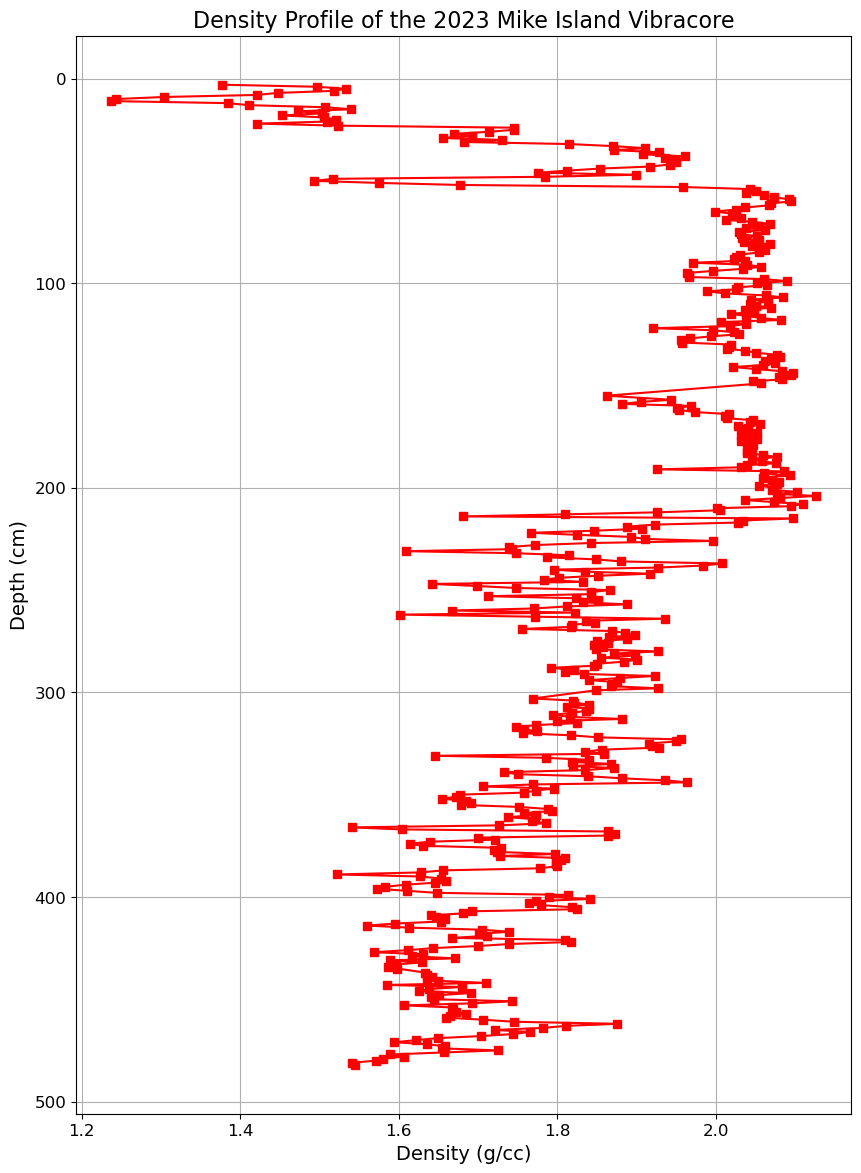

In [21]:
# Plot Density vs. Depth
plt.figure(figsize=(10, 14))  # Larger figure size
plt.plot(df_density['Density (g/cc)'], df_density['Depth (cm)'], marker='s', linestyle='-', color='r')

# Labels and title
plt.xlabel('Density (g/cc)', fontsize=14)
plt.ylabel('Depth (cm)', fontsize=14)
plt.title('Density Profile of the 2023 Mike Island Vibracore', fontsize=16)

# Invert the y-axis to display depth properly
plt.gca().invert_yaxis()

# Grid and layout adjustments
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [23]:
#Bedload Transport calculation
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Given data
rho_w = 1000  # Water density (kg/m³)
rho_s = 2650  # Quartz sediment density (kg/m³)
g = 9.81  # Gravity (m/s²)
h = 4.1  # Water depth (m)
U_values = [0.81, 1.05, 1.2]  # Flow velocities (m/s)

# Assume modal grain size (d50) from dataset
d50 = 0.0002  # Example: 200 microns = 0.0002 m


In [25]:
def calculate_shear_stress(U, h):
    # Using an empirical friction factor estimation
    f = 0.24 / (np.log10(12 * h / d50))**2  # Soulsby 1997
    tau = rho_w * f * U**2
    return tau

# Compute shear stress for different velocities
tau_values = [calculate_shear_stress(U, h) for U in U_values]

print("Shear Stress (τ) values:", tau_values)


Shear Stress (τ) values: [5.418175539455272, 9.10461596136174, 11.891743296472475]


In [26]:
# Calculate critical shear stress (Soulsby equation)
tau_cr = rho_w * g * ((rho_s / rho_w) - 1) * d50
print("Critical Shear Stress (τ_cr):", tau_cr)


Critical Shear Stress (τ_cr): 3.2373000000000003


In [27]:
#Calculate Bedload Transport Rate (q_b)

def bedload_transport(U, tau, tau_cr):
    if tau > tau_cr:
        theta = tau / (rho_w * g * ((rho_s / rho_w) - 1) * d50)
        theta_cr = tau_cr / (rho_w * g * ((rho_s / rho_w) - 1) * d50)
        phi_mpm = 8 * (theta - theta_cr)**1.5
        qb = phi_mpm * np.sqrt(g * ((rho_s / rho_w) - 1) * d50**3)
        return qb
    else:
        return 0  # No transport if below threshold

# Compute transport rates
qb_values = [bedload_transport(U, tau, tau_cr) for U, tau in zip(U_values, tau_values)]

print("Bedload Transport Rates:", qb_values)


Bedload Transport Rates: [5.0336539729043794e-05, 0.00022212439069694884, 0.00039791997495150977]


In [28]:
# Convert to daily transport rates (kg/m/day)
qb_daily = [qb * 86400 * rho_s for qb in qb_values]
print("Daily Bedload Transport Rates (kg/m/day):", qb_daily)


Daily Bedload Transport Rates (kg/m/day): [11525.054136361867, 50857.600493973405, 91107.75746489769]


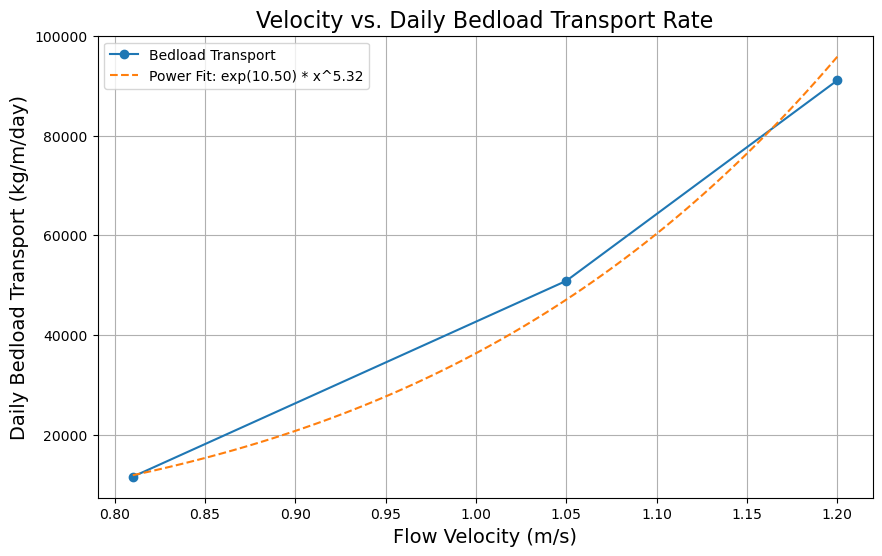

In [29]:
# Plot transport rate vs. velocity
plt.figure(figsize=(10, 6))
plt.plot(U_values, qb_daily, marker='o', linestyle='-', label="Bedload Transport")

# Labels and title
plt.xlabel('Flow Velocity (m/s)', fontsize=14)
plt.ylabel('Daily Bedload Transport (kg/m/day)', fontsize=14)
plt.title('Velocity vs. Daily Bedload Transport Rate', fontsize=16)

# Fit trendline
coeffs = np.polyfit(np.log(U_values), np.log(qb_daily), 1)
trend_x = np.linspace(min(U_values), max(U_values), 100)
trend_y = np.exp(coeffs[1]) * trend_x**coeffs[0]
plt.plot(trend_x, trend_y, linestyle="--", label=f"Power Fit: exp({coeffs[1]:.2f}) * x^{coeffs[0]:.2f}")

# Grid, legend, and display
plt.legend()
plt.grid()
plt.show()


In [2]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd

# Define given parameters
rho_w = 1000  # Water density (kg/m³)
h = 4.1  # Water depth (m)
d50 = 0.0002  # Median grain size (m) (200 microns)
U_values = [0.81, 1.05, 1.2]  # Flow velocities (m/s)

# Compute friction factor (f) using Soulsby's equation
def compute_friction_factor(h, d50):
    return 0.24 / (np.log10(12 * h / d50))**2

# Compute shear stress (τ) using Soulsby's equation
def compute_shear_stress(U, rho_w, f):
    return rho_w * f * U**2

# Compute f and τ for each velocity
f = compute_friction_factor(h, d50)
tau_values = [compute_shear_stress(U, rho_w, f) for U in U_values]

# Display results
shear_stress_results = pd.DataFrame({
    "Flow Velocity (m/s)": U_values,
    "Shear Stress (Pa)": tau_values
})

# Display results in a table format
import ace_tools as tools
tools.display_dataframe_to_user(name="Shear Stress Calculation", dataframe=shear_stress_results)


ModuleNotFoundError: No module named 'ace_tools'